# 8.3.3 Detección de outliers usando Isolation Forest

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

import warnings
warnings.filterwarnings("ignore")

Link: https://youtu.be/JAf5GbSJ374?si=p1hEbYo6dRl8hZvn

Links: https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html

En esta lección se aborda la detección de outliers usando Isolation Forest. <br>
Esta metodología está inspirada en el algoritmo Random Forest.

## 8.3.3.1 Isolation Tree

Este es un árbol de decisión que puede aislar en sus nodos terminales, los patrones del conjunto de datos.

El algoritmo aplica particionamiento recursivo sobre el conjunto de datoas con el fin de aislar cada patrón.

Para realizar el particionamiento, se selecciona aleatoriamente un atributo y se genera un corte aleatorio entre el valor máximo y mínimo de dicho atributo.

El particionamiento aleatorio se realiza hasta aislar todas las observaciones.

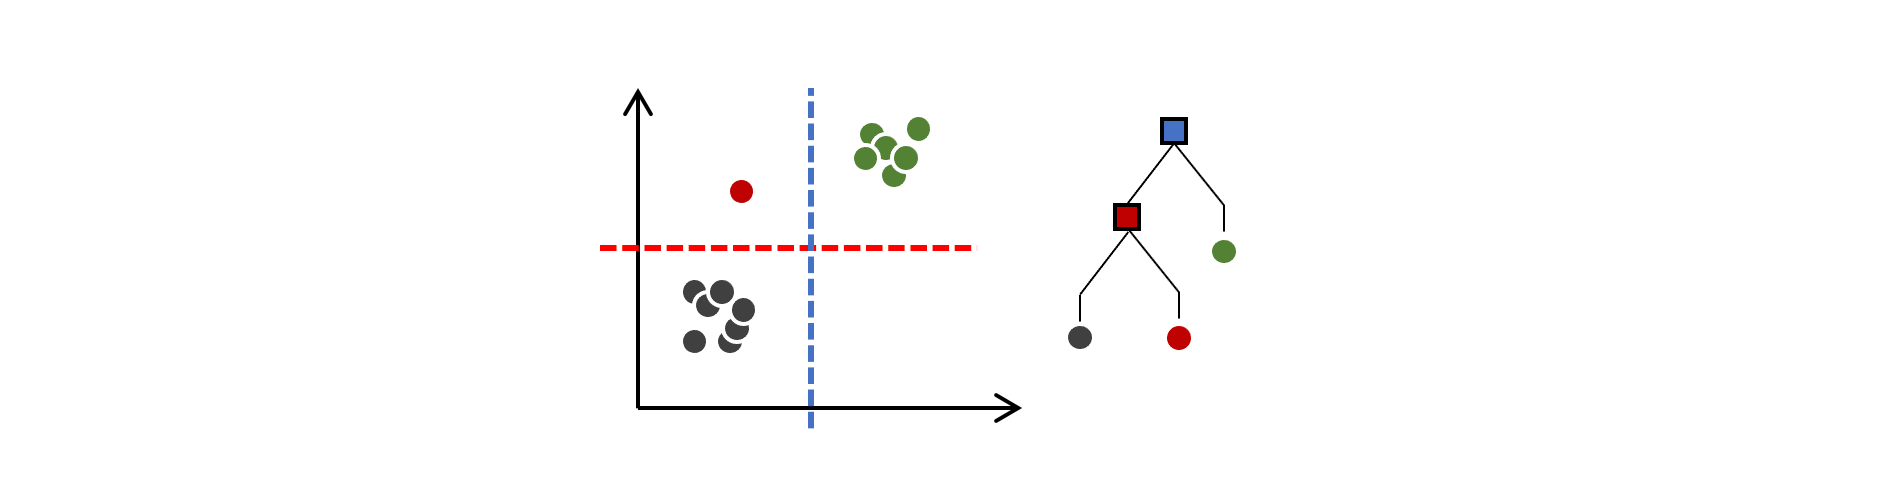

## 8.3.3.2 Isolation Forest

Se obtiene al combinar muchos **isolation trees** entrenados sobre muestras bootstrap de los datos.

A cada punto se le asigna un valor que corresponde al promedio de nodos (profunidad del árbol) que deben recorrerse para aislarlo completamente. A menor valor del promedio, mayor probabilidad de que sea una anomalia.

En la práctica se fija un valor máximo de la profunidad de los árboles.

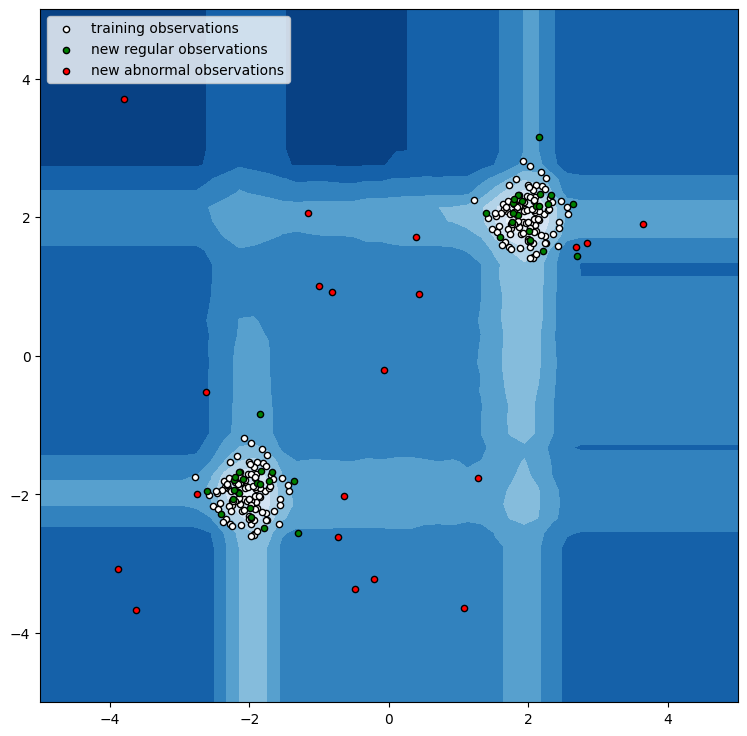

In [3]:


rng = np.random.RandomState(42)


X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]

X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]

X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))


clf = IsolationForest(
    # -----------------------------------------------------
    # The number of base estimators in the ensemble.
    n_estimators=100,
    # -----------------------------------------------------
    # The number of samples to draw from X to train each
    # base estimator.
    max_samples=100,
    # -----------------------------------------------------
    # The amount of contamination of the data set, i.e.
    # the proportion of outliers in the data set
    contamination="auto",
    # -----------------------------------------------------
    # The number of features to draw from X to train each
    # base estimator.
    max_features=1.0,
    # -----------------------------------------------------
    # If True, individual trees are fit on random subsets
    # of the training data sampled with replacement. If
    # False, sampling without replacement is performed.
    bootstrap=False,
    # -----------------------------------------------------
    # Controls the pseudo-randomness of the selection of
    # the feature and split values for each branching step
    # and each tree in the forest.
    random_state=rng,
)


clf.fit(X_train)

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)


xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure(figsize=(9, 9))
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=20, edgecolor="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="green", s=20, edgecolor="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="red", s=20, edgecolor="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend(
    [b1, b2, c],
    ["training observations", "new regular observations", "new abnormal observations"],
    loc="upper left",
)
plt.show()

In [4]:
print('ok_')

ok_
